In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fer2013


In [ ]:
import os

base_dir = "/kaggle/input/fer2013"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Ver clases en train
print("Clases en train:", os.listdir(train_dir))
print("Clases en validation:", os.listdir(test_dir))

Clases en train: ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']
Clases en validation: ['surprise', 'fear', 'angry', 'neutral', 'sad', 'disgust', 'happy']


In [ ]:
#Numero de datos
train_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
validation_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in os.listdir(test_dir)}

print("Cantidad de imágenes en train:")
for cls, count in train_counts.items():
    print(f"{cls}: {count}")

print("\nCantidad de imágenes en validation:")
for cls, count in validation_counts.items():
    print(f"{cls}: {count}")
print("\n")
print(f"Total de imágenes en train: {sum(train_counts.values())}")
print(f"Total de imágenes en validation: {sum(validation_counts.values())}")

Cantidad de imágenes en train:
surprise: 3171
fear: 4097
angry: 3995
neutral: 4965
sad: 4830
disgust: 436
happy: 7215

Cantidad de imágenes en validation:
surprise: 831
fear: 1024
angry: 958
neutral: 1233
sad: 1247
disgust: 111
happy: 1774


Total de imágenes en train: 28709
Total de imágenes en validation: 7178


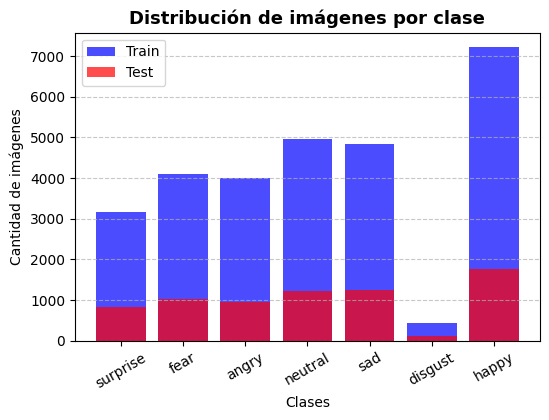

In [ ]:
# Histograma
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)

# Contar imágenes en cada clase dentro de train y validation
train_counts = {cls: len(os.listdir(os.path.join(train_dir, cls))) for cls in os.listdir(train_dir)}
validation_counts = {cls: len(os.listdir(os.path.join(test_dir, cls))) for cls in os.listdir(test_dir)}

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
plt.bar(train_counts.keys(), train_counts.values(), alpha=0.7, label="Train", color='b')
plt.bar(validation_counts.keys(), validation_counts.values(), alpha=0.7, label="Test", color='r')

# Etiquetas y título
plt.xlabel("Clases")
plt.ylabel("Cantidad de imágenes")
plt.title("Distribución de imágenes por clase", fontsize=13, fontweight='semibold')
plt.xticks(rotation=30)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
pdf_path = "DistribucionClases_FER2013.pdf"
plt.savefig(pdf_path, format="pdf", bbox_inches="tight")
# Mostrar gráfico
plt.show()

# guardar imagen en pdf


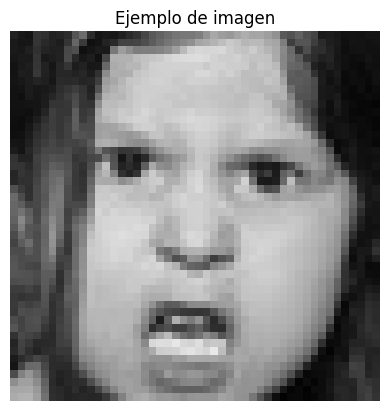

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random

# Seleccionar una imagen aleatoria de la clase 'angry'
angry_path = os.path.join(train_dir, "angry")
angry_images = os.listdir(angry_path)

if angry_images:  # Verifica que haya imágenes en la carpeta
    sample_image = random.choice(angry_images)  # Selecciona una imagen aleatoria
    image_path = os.path.join(angry_path, sample_image)

    # Cargar y convertir a RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Mostrar imagen
    plt.imshow(image)
    plt.axis("off")
    plt.title("Ejemplo de imagen")
    plt.show()


In [ ]:
# COMPROBAR DIMENSIONES DE IMAGENES ( EN CASO DE REDIMENSIONAR ES UNA DESVENTAJA PARA EL DATASET)
import cv2
import numpy as np

image_sizes = []

for cls in os.listdir(train_dir):
    class_path = os.path.join(train_dir, cls)
    sample_images = os.listdir(class_path)[:10]  # Analizar solo 10 imágenes por clase
    for img_name in sample_images:
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            image_sizes.append(img.shape[:2])  # (Alto, Ancho)

# Convertir a array de NumPy
image_sizes = np.array(image_sizes)

# Mostrar estadísticas
print(f"Dimensión mínima: {image_sizes.min(axis=0)}")
print(f"Dimensión máxima: {image_sizes.max(axis=0)}")
print(f"Dimensión promedio: {image_sizes.mean(axis=0)}")

Dimensión mínima: [48 48]
Dimensión máxima: [48 48]
Dimensión promedio: [48. 48.]


      Clase  Train  Validation    % Train  % Validation
0  surprise   3171         831  11.045317     11.577041
1      fear   4097        1024  14.270786     14.265812
2     angry   3995         958  13.915497     13.346336
3   neutral   4965        1233  17.294228     17.177487
4       sad   4830        1247  16.823992     17.372527
5   disgust    436         111   1.518688      1.546392
6     happy   7215        1774  25.131492     24.714405


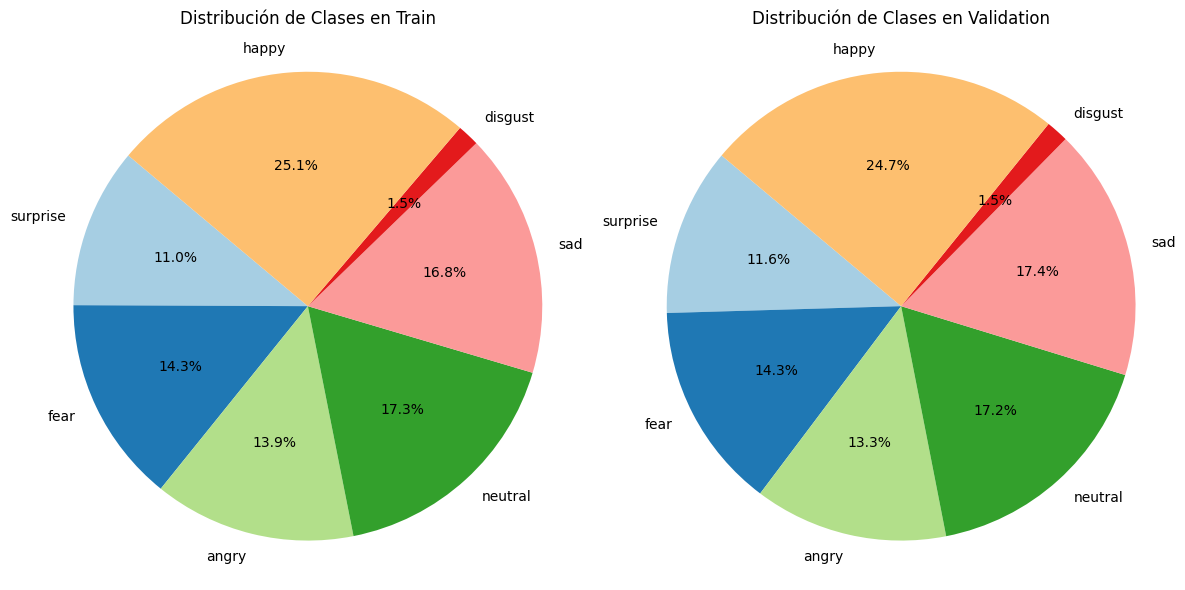

In [ ]:
# BALANCE DE CLASES
import pandas as pd

# Convertir los conteos en DataFrame
df_counts = pd.DataFrame({"Clase": list(train_counts.keys()),
                          "Train": list(train_counts.values()),
                          "Validation": list(validation_counts.values())})

# Calcular porcentaje
df_counts["% Train"] = (df_counts["Train"] / df_counts["Train"].sum()) * 100
df_counts["% Validation"] = (df_counts["Validation"] / df_counts["Validation"].sum()) * 100

print(df_counts)

# GRAFICO DE TORTA CON BALANCE
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# Gráfico de Train
axes[0].pie(df_counts["% Train"], labels=df_counts["Clase"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
axes[0].set_title("Distribución de Clases en Train")
axes[0].axis("equal")  # Para que el círculo no se deforme

# Gráfico de Validation
axes[1].pie(df_counts["% Validation"], labels=df_counts["Clase"], autopct="%1.1f%%", startangle=140, colors=plt.cm.Paired.colors)
axes[1].set_title("Distribución de Clases en Validation")
axes[1].axis("equal")  # Para que el círculo no se deforme

plt.tight_layout()
plt.savefig('BalanceClases_dataset1.pdf', format="pdf", bbox_inches="tight") # guardar
# Mostrar gráficos
plt.show()

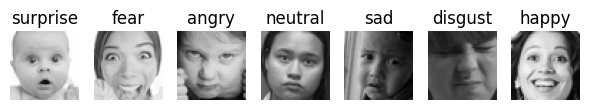

In [ ]:
# COLLAGE PRUEBA
# Obtener las clases
classes = os.listdir(train_dir)
num_classes = len(classes)

# Crear figura para el collage
fig, axes = plt.subplots(1, num_classes, figsize=(6, 4))  # Ajusta el tamaño según necesites

for i, cls in enumerate(classes):
    class_path = os.path.join(train_dir, cls)
    img_name = random.choice(os.listdir(class_path))  # Selecciona imagen aleatoria
    img_path = os.path.join(class_path, img_name)

    # Cargar imagen
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Mostrar en la figura
    axes[i].imshow(img)
    axes[i].set_title(cls)
    axes[i].axis("off")  # Quitar ejes

# Ajustar el diseño
plt.tight_layout()
plt.savefig('CollageClases_FER2013.pdf', format="pdf", bbox_inches="tight") # guardar
# Mostrar collage
plt.show()